#DB SCHEMA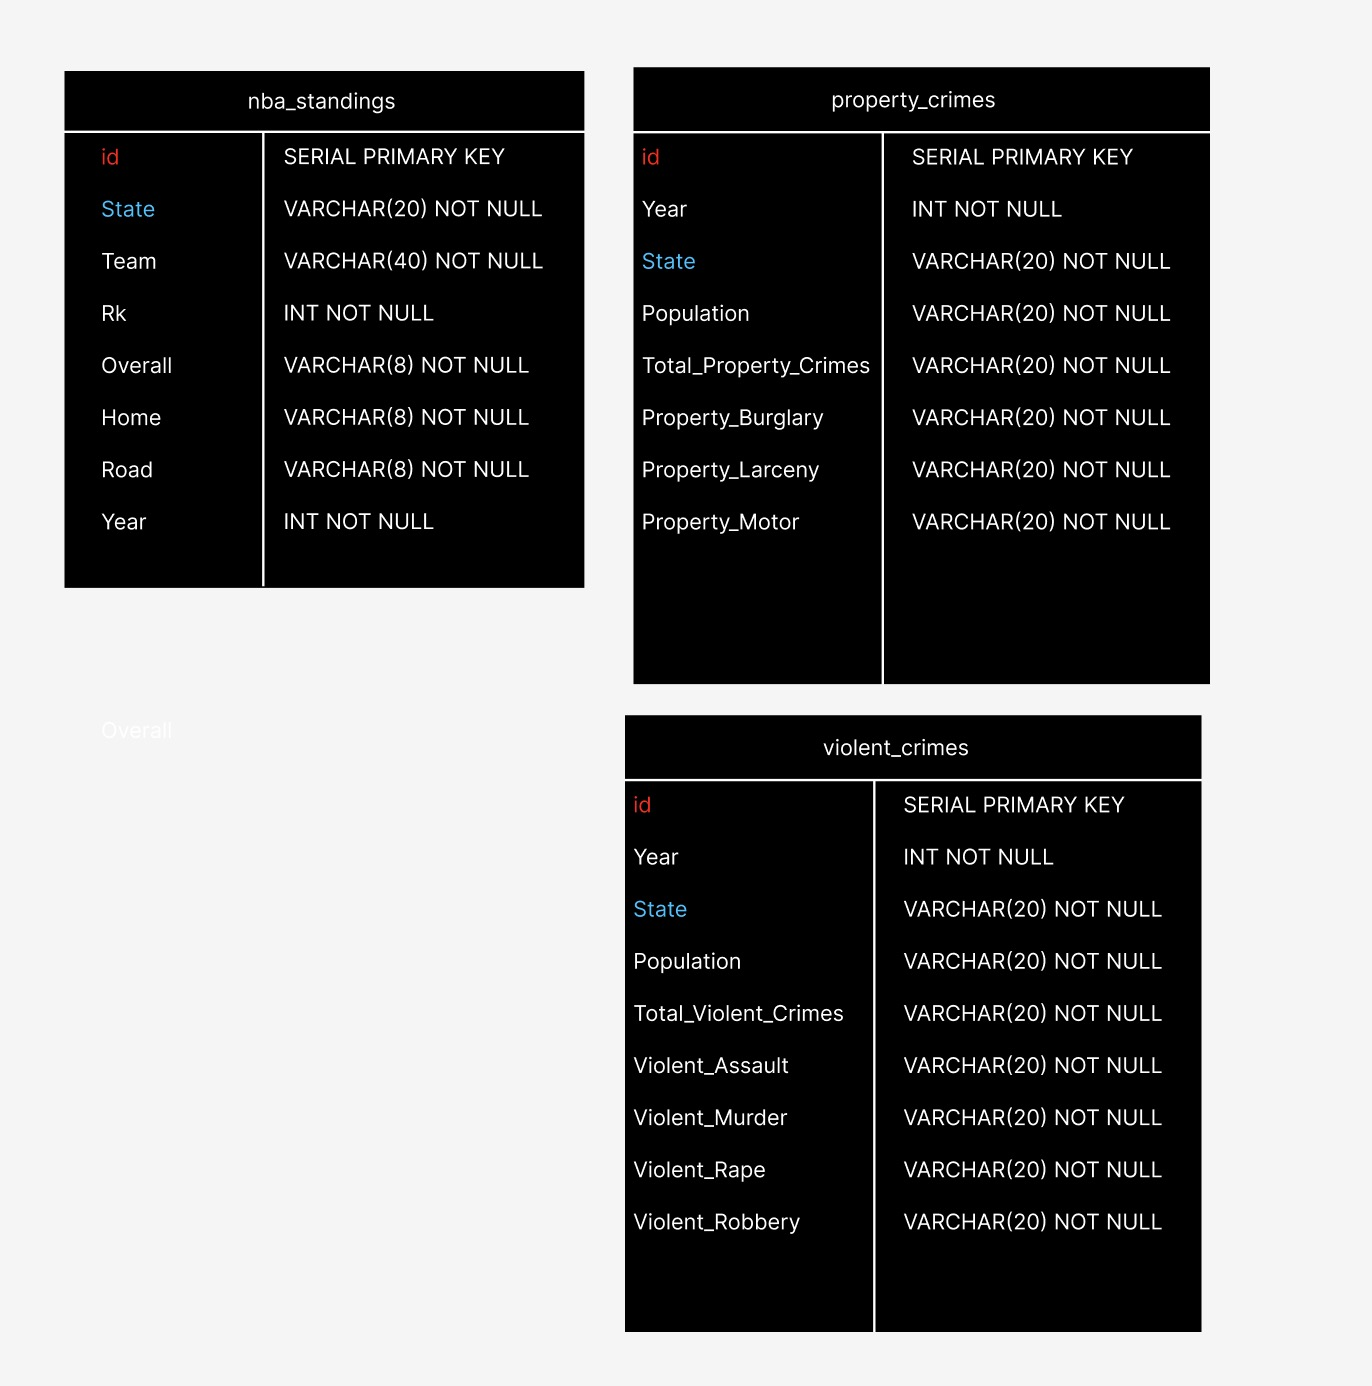

primary key in RED color &

foreign key in BLUE color

# **What is your goal?**

My goal is to load in nba standings data and crime rate data into a relational database.

# **What types of questions will you be able to answer?**

Overall, I will be able to answer questions relating to how any NBA team's success can benefit their state in terms of crime. Or if a team is doing poorly does crime increase? I will be looking at crime data and NBA records from 2010-2019

# **What can your RDB be used for, who would the end user be?**

The RDB could be used by city officials and NBA teams to look at the potential impact an NBA
team's success could have on a state as a whole. In general, it highlights the broader societal
implications the NBA can have on an area

#EXTRACT & EXPLORE


In [1]:
#imports
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
NBA standings data from amazon s3 - Standings from 2010/11 Season to 2018/19 for all 30 NBA teams

Links to datasets:
https://www.basketball-reference.com/leagues/NBA_2011_standings.html
https://www.basketball-reference.com/leagues/NBA_2012_standings.html
https://www.basketball-reference.com/leagues/NBA_2013_standings.html
https://www.basketball-reference.com/leagues/NBA_2014_standings.html
https://www.basketball-reference.com/leagues/NBA_2015_standings.html
https://www.basketball-reference.com/leagues/NBA_2016_standings.html
https://www.basketball-reference.com/leagues/NBA_2017_standings.html
https://www.basketball-reference.com/leagues/NBA_2018_standings.html
https://www.basketball-reference.com/leagues/NBA_2019_standings.html
"""
NBA_2010_11 = pd.read_csv('https://ista322finalproject.s3.amazonaws.com/2010-11_NBA_Standings.csv', index_col = 1, skiprows = 1)
NBA_2011_12 = pd.read_csv('https://ista322finalproject.s3.amazonaws.com/2011-12_NBA_Standings.csv', index_col = 1, skiprows = 1)
NBA_2012_13 = pd.read_csv('https://ista322finalproject.s3.amazonaws.com/2012-13_NBA_Standings.csv', index_col = 1, skiprows = 1)
NBA_2013_14 = pd.read_csv('https://ista322finalproject.s3.amazonaws.com/2013-14_NBA_Standings.csv', index_col = 1, skiprows = 1)
NBA_2014_15 = pd.read_csv('https://ista322finalproject.s3.amazonaws.com/2014-15_NBA_Standings.csv', index_col = 1, skiprows = 1)
NBA_2015_16 = pd.read_csv('https://ista322finalproject.s3.amazonaws.com/2015-16_NBA_Standings.csv', index_col = 1, skiprows = 1)
NBA_2016_17 = pd.read_csv('https://ista322finalproject.s3.amazonaws.com/2016-17_NBA_Standings.csv', index_col = 1, skiprows = 1)
NBA_2017_18 = pd.read_csv('https://ista322finalproject.s3.amazonaws.com/2017-18_NBA_Standings.csv', index_col = 1, skiprows = 1)
NBA_2018_19 = pd.read_csv('https://ista322finalproject.s3.amazonaws.com/2018-19_NBA_Standings.csv', index_col = 1, skiprows = 1)


"""
Crime rates data from amazon s3

Link to datatset:
https://corgis-edu.github.io/corgis/csv/state_crime/
"""
crimes = pd.read_csv('https://ista322finalproject.s3.amazonaws.com/state_crime.csv')

In [3]:
#lets take a look at one of the standings df. They all follow this same formart
NBA_2010_11

,Rk,Overall,Home,Road,E,W,A,C,SE,NW,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
Team,,,,,,,,,,,,,,,,,,,,,
Chicago Bulls,1,62-20,36-5,26-15,39-13,23-7,10-8,15-1,14-4,7-3,...,24-4,9-5,31-5,1-1,8-5,12-4,12-4,8-3,13-3,8-0
San Antonio Spurs,2,61-21,36-5,25-16,23-7,38-14,6-4,9-1,8-2,14-4,...,15-11,7-4,32-9,1-1,14-1,13-2,12-3,9-3,8-8,4-3
Miami Heat,3,58-24,30-11,28-13,38-14,20-10,13-5,12-6,13-3,6-4,...,17-9,2-8,35-6,3-1,7-7,15-1,9-5,9-3,9-6,6-1
Dallas Mavericks,4,57-25,29-12,28-13,22-8,35-17,9-1,4-6,9-1,12-6,...,17-9,10-6,22-8,2-1,11-3,11-3,8-8,11-1,10-6,4-3
Los Angeles Lakers,5,57-25,30-11,27-14,21-9,36-16,9-1,6-4,6-4,12-6,...,19-6,4-4,30-9,3-0,10-5,10-5,10-5,9-4,12-1,3-5
Boston Celtics,6,56-26,33-8,23-18,37-15,19-11,13-3,13-5,11-7,8-2,...,16-12,8-8,30-7,2-1,11-3,11-3,12-4,7-4,9-7,4-4
Oklahoma City Thunder,7,55-27,30-11,25-16,22-8,33-19,6-4,8-2,8-2,13-3,...,20-8,10-5,22-8,2-1,10-5,11-5,7-6,6-5,14-2,5-3
Orlando Magic,8,52-30,29-12,23-18,36-16,16-14,12-6,13-5,11-5,4-6,...,16-9,6-7,33-9,1-1,12-3,8-8,10-6,7-4,9-6,5-2
Denver Nuggets,9,50-32,33-8,17-24,20-10,30-22,5-5,8-2,7-3,9-7,...,18-7,7-8,29-10,2-1,8-5,8-7,10-7,7-6,10-3,5-3


In [4]:
crimes

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,586107,1902.6,300.6,1500.9,101.0,222.1,179.8,2.7,...,10.1,11151,1762,8797,592,1302,1054,16,173,59
3111,Wyoming,2016,585501,1957.3,302.5,1518.2,136.6,244.2,195.7,3.4,...,10.1,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,1830.4,275.0,1421.0,134.5,237.5,176.4,2.6,...,13.1,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,1785.1,264.0,1375.9,145.2,212.2,150.6,2.3,...,17.3,10313,1525,7949,839,1226,870,13,243,100


#TRANSFORM

In [5]:
# select columns we want from crimes df
crime = crimes[['State', 'Year', 'Data.Population', 'Data.Totals.Property.All', 'Data.Totals.Property.Burglary', 'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor', 'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault', 'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape', 'Data.Totals.Violent.Robbery']]
crime

,State,Year,Data.Population,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,46290,15898,26713,3679,7260,5555,316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,586107,11151,1762,8797,592,1302,1054,16,173,59
3111,Wyoming,2016,585501,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,10313,1525,7949,839,1226,870,13,243,100


In [6]:
# Renaming columns for clarity
crime.columns = ['State', 'Year', 'Population', 'Total_Property_Crimes', 'Property_Burglary', 'Propert_Larceny', 'Property_Motor', 'Total_Violent_Crimes', 'Violent_Assault', 'Violent_Murder', 'Violent_Rape', 'Violent_Robbery' ]
crime

,State,Year,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
0,Alabama,1960,3266740,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,46290,15898,26713,3679,7260,5555,316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,586107,11151,1762,8797,592,1302,1054,16,173,59
3111,Wyoming,2016,585501,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,10313,1525,7949,839,1226,870,13,243,100


In [7]:
# Add a comma as a a thounsands seperator for readability
crime['Population'] = crime['Population'].map('{:,}'.format)
crime['Total_Property_Crimes'] = crime['Total_Property_Crimes'].map('{:,}'.format)
crime['Total_Violent_Crimes'] = crime['Total_Violent_Crimes'].map('{:,}'.format)
crime['Property_Burglary'] = crime['Property_Burglary'].map('{:,}'.format)
crime['Propert_Larceny'] = crime['Propert_Larceny'].map('{:,}'.format)
crime['Property_Motor'] = crime['Property_Motor'].map('{:,}'.format)
crime['Violent_Assault'] = crime['Violent_Assault'].map('{:,}'.format)
crime['Violent_Murder'] = crime['Violent_Murder'].map('{:,}'.format)
crime['Violent_Rape'] = crime['Violent_Rape'].map('{:,}'.format)
crime['Violent_Robbery'] = crime['Violent_Robbery'].map('{:,}'.format)

crime

<ipython-input-7-0c3fce69ef7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime['Population'] = crime['Population'].map('{:,}'.format)
<ipython-input-7-0c3fce69ef7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime['Total_Property_Crimes'] = crime['Total_Property_Crimes'].map('{:,}'.format)
<ipython-input-7-0c3fce69ef7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,State,Year,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
0,Alabama,1960,"3,266,740","33,823","11,626","19,344","2,853","6,097","4,512",406,281,898
1,Alabama,1961,"3,302,000","32,541","11,205","18,801","2,535","5,564","4,255",427,252,630
2,Alabama,1962,"3,358,000","35,829","11,722","21,306","2,801","5,283","3,995",316,218,754
3,Alabama,1963,"3,347,000","38,521","12,614","22,874","3,033","6,115","4,755",340,192,828
4,Alabama,1964,"3,407,000","46,290","15,898","26,713","3,679","7,260","5,555",316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,"586,107","11,151","1,762","8,797",592,"1,302","1,054",16,173,59
3111,Wyoming,2016,"585,501","11,460","1,771","8,889",800,"1,430","1,146",20,205,59
3112,Wyoming,2017,"579,315","10,604","1,593","8,232",779,"1,376","1,022",15,263,76
3113,Wyoming,2018,"577,737","10,313","1,525","7,949",839,"1,226",870,13,243,100


In [8]:
# Only need year from 2011 on because these are the years of the NBA data being looked at, so grabbing rows from 2011-2019
crime_2011_to_2019 = crime.loc[(crime['Year'] >= 2011) & (crime['Year'] <= 2019)]
crime_2011_to_2019

,State,Year,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
51,Alabama,2011,"4,803,689","173,192","51,119","111,411","10,662","20,166","13,591",299,"1,370","4,906"
52,Alabama,2012,"4,822,023","168,878","47,481","111,523","9,874","21,693","15,035",342,"1,296","5,020"
53,Alabama,2013,"4,833,722","161,993","42,429","108,993","10,571","20,826","13,787",347,"2,044","4,648"
54,Alabama,2014,"4,849,377","154,094","39,715","104,238","10,141","20,727","13,745",276,"2,005","4,701"
55,Alabama,2015,"4,858,979","144,746","35,255","99,156","10,335","22,952","15,954",348,"2,039","4,611"
...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,"586,107","11,151","1,762","8,797",592,"1,302","1,054",16,173,59
3111,Wyoming,2016,"585,501","11,460","1,771","8,889",800,"1,430","1,146",20,205,59
3112,Wyoming,2017,"579,315","10,604","1,593","8,232",779,"1,376","1,022",15,263,76
3113,Wyoming,2018,"577,737","10,313","1,525","7,949",839,"1,226",870,13,243,100


In [9]:
#Which states actually have NBA teams... Not all 50 states in the crime df are needed

"""
1. Arizona:
  Phoenix Suns

2. California:
  Golden State Warriors
  Los Angeles Clippers
  Los Angeles Lakers
  Sacramento Kings

3. Colorado:
  Denver Nuggets

4. Florida:
  Miami Heat
  Orlando Magic

5. Georgia:
  Atlanta Hawks

6. Illinois:
  Chicago Bulls

7. Indiana:
  Indiana Pacers

8. Louisiana:
  New Orleans Pelicans

9. Massachusetts:
  Boston Celtics

10. Michigan:
  Detroit Pistons

11. Minnesota:
  Minnesota Timberwolves

12. New York:
  Brooklyn Nets
  New York Knicks

13. North Carolina:
  Charlotte Hornets

14. Ohio:
  Cleveland Cavaliers

15. Oklahoma:
  Oklahoma City Thunder

16. Oregon:
  Portland Trail Blazers

17. Pennsylvania:
  Philadelphia 76ers

18. Tennessee:
  Memphis Grizzlies

19. Texas:
  Dallas Mavericks
  Houston Rockets
  San Antonio Spurs

20. Utah:
  Utah Jazz

21. Wisconsin:
  Milwaukee Bucks

22. Washington DC*:
  Washington Wizards
"""

'\n1. Arizona:\n  Phoenix Suns\n\n2. California:\n  Golden State Warriors\n  Los Angeles Clippers\n  Los Angeles Lakers\n  Sacramento Kings\n\n3. Colorado:\n  Denver Nuggets\n\n4. Florida:\n  Miami Heat\n  Orlando Magic\n\n5. Georgia:\n  Atlanta Hawks\n\n6. Illinois:\n  Chicago Bulls\n\n7. Indiana:\n  Indiana Pacers\n\n8. Louisiana:\n  New Orleans Pelicans\n\n9. Massachusetts:\n  Boston Celtics\n\n10. Michigan:\n  Detroit Pistons\n\n11. Minnesota:\n  Minnesota Timberwolves\n\n12. New York:\n  Brooklyn Nets\n  New York Knicks\n\n13. North Carolina:\n  Charlotte Hornets\n\n14. Ohio:\n  Cleveland Cavaliers\n\n15. Oklahoma:\n  Oklahoma City Thunder\n\n16. Oregon:\n  Portland Trail Blazers\n\n17. Pennsylvania:\n  Philadelphia 76ers\n\n18. Tennessee:\n  Memphis Grizzlies\n\n19. Texas:\n  Dallas Mavericks\n  Houston Rockets\n  San Antonio Spurs\n\n20. Utah:\n  Utah Jazz\n\n21. Wisconsin:\n  Milwaukee Bucks\n\n22. Washington DC*:\n  Washington Wizards\n'

In [10]:
# List of states with NBA teams
nba_states = ['Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Louisiana',
              'Massachusetts', 'Michigan', 'Minnesota', 'New York', 'North Carolina', 'Ohio', 'Oklahoma',
              'Oregon', 'Pennsylvania', 'Tennessee', 'Texas', 'Utah', 'Wisconsin', 'District of Columbia']

# Filter the crime DataFrame based on the states with NBA teams
nba_crime_states = crime_2011_to_2019[crime_2011_to_2019['State'].isin(nba_states)]

# Show that we have the correct states
nba_crime_states['State'].unique()

array(['Arizona', 'California', 'Colorado', 'District of Columbia',
       'Florida', 'Georgia', 'Illinois', 'Indiana', 'Louisiana',
       'Massachusetts', 'Michigan', 'Minnesota', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Tennessee', 'Texas', 'Utah', 'Wisconsin'], dtype=object)

In [11]:
nba_crime_states

,State,Year,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
171,Arizona,2011,"6,467,315","229,896","54,695","155,400","19,801","26,789","16,748",397,"2,499","7,145"
172,Arizona,2012,"6,553,255","231,930","52,934","159,838","19,158","28,108","18,087",358,"2,277","7,386"
173,Arizona,2013,"6,626,624","225,243","48,533","159,272","17,438","27,599","17,490",357,"3,050","6,702"
174,Arizona,2014,"6,731,484","215,240","43,562","154,091","17,587","26,916","16,970",319,"3,378","6,249"
175,Arizona,2015,"6,828,065","207,107","37,957","152,365","16,785","28,012","18,235",309,"3,108","6,360"
...,...,...,...,...,...,...,...,...,...,...,...,...
3050,Wisconsin,2015,"5,771,337","113,924","19,554","83,385","10,985","17,647","10,395",240,"1,780","5,232"
3051,Wisconsin,2016,"5,778,708","111,720","19,425","82,337","9,958","17,679","10,765",229,"1,979","4,706"
3052,Wisconsin,2017,"5,795,483","104,802","17,599","77,735","9,468","18,539","11,869",186,"2,139","4,345"
3053,Wisconsin,2018,"5,813,568","90,686","14,099","67,953","8,634","17,176","11,263",176,"2,248","3,489"


In [12]:
# create list of all nba standings df, so we can combine them all
all_seasons = [NBA_2010_11, NBA_2011_12, NBA_2012_13, NBA_2013_14, NBA_2014_15, NBA_2015_16, NBA_2016_17, NBA_2017_18, NBA_2018_19]

# Combine each seasons standings into a single DataFrame
all_seasons_df = pd.concat(all_seasons)
all_seasons_df

,Rk,Overall,Home,Road,E,W,A,C,SE,NW,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
Team,,,,,,,,,,,,,,,,,,,,,
Chicago Bulls,1,62-20,36-5,26-15,39-13,23-7,10-8,15-1,14-4,7-3,...,24-4,9-5,31-5,1-1,8-5,12-4,12-4,8-3,13-3,8-0
San Antonio Spurs,2,61-21,36-5,25-16,23-7,38-14,6-4,9-1,8-2,14-4,...,15-11,7-4,32-9,1-1,14-1,13-2,12-3,9-3,8-8,4-3
Miami Heat,3,58-24,30-11,28-13,38-14,20-10,13-5,12-6,13-3,6-4,...,17-9,2-8,35-6,3-1,7-7,15-1,9-5,9-3,9-6,6-1
Dallas Mavericks,4,57-25,29-12,28-13,22-8,35-17,9-1,4-6,9-1,12-6,...,17-9,10-6,22-8,2-1,11-3,11-3,8-8,11-1,10-6,4-3
Los Angeles Lakers,5,57-25,30-11,27-14,21-9,36-16,9-1,6-4,6-4,12-6,...,19-6,4-4,30-9,3-0,10-5,10-5,10-5,9-4,12-1,3-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Atlanta Hawks,26,29-53,17-24,12-29,16-36,13-17,4-14,6-12,6-10,5-5,...,10-14,9-6,7-31,2-5,3-13,6-7,5-9,5-7,7-8,1-4
Chicago Bulls,27,22-60,9-32,13-28,16-36,6-24,4-14,3-13,9-9,1-9,...,8-16,8-8,9-31,2-6,3-12,5-9,2-13,5-5,4-11,1-4
Cleveland Cavaliers,28,19-63,13-28,6-35,15-37,4-26,6-12,4-12,5-13,0-10,...,7-17,5-4,6-43,1-6,3-11,4-12,3-12,4-6,4-11,0-5


In [13]:
# Do not need all these columns, only intrested in Team, Rk, Home, Road
NBA_2011_to_2019 = all_seasons_df[['Rk', 'Overall', 'Home', 'Road']]
NBA_2011_to_2019

,Rk,Overall,Home,Road
Team,,,,
Chicago Bulls,1,62-20,36-5,26-15
San Antonio Spurs,2,61-21,36-5,25-16
Miami Heat,3,58-24,30-11,28-13
Dallas Mavericks,4,57-25,29-12,28-13
Los Angeles Lakers,5,57-25,30-11,27-14
...,...,...,...,...
Atlanta Hawks,26,29-53,17-24,12-29
Chicago Bulls,27,22-60,9-32,13-28
Cleveland Cavaliers,28,19-63,13-28,6-35


In [14]:
 # Adding year column for clarity. 30 NBA teams, so every 30 rows will be a new year

# Creating a list of years corresponding for 30 teams
years = ['2011'] * 30 + ['2012'] * 30 + ['2013'] * 30 + ['2014'] * 30 + ['2015'] * 30 + ['2016'] * 30 + ['2017'] * 30 + ['2018'] * 30 + ['2019'] * 30

# Adding a 'Year' column to the df
NBA_2011_to_2019['Year'] = years

NBA_2011_to_2019

<ipython-input-14-1951f4289b86>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_2011_to_2019['Year'] = years


,Rk,Overall,Home,Road,Year
Team,,,,,
Chicago Bulls,1,62-20,36-5,26-15,2011
San Antonio Spurs,2,61-21,36-5,25-16,2011
Miami Heat,3,58-24,30-11,28-13,2011
Dallas Mavericks,4,57-25,29-12,28-13,2011
Los Angeles Lakers,5,57-25,30-11,27-14,2011
...,...,...,...,...,...
Atlanta Hawks,26,29-53,17-24,12-29,2019
Chicago Bulls,27,22-60,9-32,13-28,2019
Cleveland Cavaliers,28,19-63,13-28,6-35,2019


In [15]:
# need to get rid of Team column as the index so I can reference it in the next step
NBA_2011_to_2019.reset_index(inplace=True)
NBA_2011_to_2019

,Team,Rk,Overall,Home,Road,Year
0,Chicago Bulls,1,62-20,36-5,26-15,2011
1,San Antonio Spurs,2,61-21,36-5,25-16,2011
2,Miami Heat,3,58-24,30-11,28-13,2011
3,Dallas Mavericks,4,57-25,29-12,28-13,2011
4,Los Angeles Lakers,5,57-25,30-11,27-14,2011
...,...,...,...,...,...,...
265,Atlanta Hawks,26,29-53,17-24,12-29,2019
266,Chicago Bulls,27,22-60,9-32,13-28,2019
267,Cleveland Cavaliers,28,19-63,13-28,6-35,2019
268,Phoenix Suns,29,19-63,12-29,7-34,2019


In [16]:
team_state_mapping = {
    'Phoenix Suns': 'Arizona',
    'Golden State Warriors': 'California',
    'Los Angeles Clippers': 'California',
    'Los Angeles Lakers': 'California',
    'Sacramento Kings': 'California',
    'Denver Nuggets': 'Colorado',
    'Miami Heat': 'Florida',
    'Orlando Magic': 'Florida',
    'Atlanta Hawks': 'Georgia',
    'Chicago Bulls': 'Illinois',
    'Indiana Pacers': 'Indiana',
    'New Orleans Pelicans': 'Louisiana',
    'Boston Celtics': 'Massachusetts',
    'Detroit Pistons': 'Michigan',
    'Minnesota Timberwolves': 'Minnesota',
    'Brooklyn Nets': 'New York',
    'New York Knicks': 'New York',
    'Charlotte Hornets': 'North Carolina',
    'Cleveland Cavaliers': 'Ohio',
    'Oklahoma City Thunder': 'Oklahoma',
    'Portland Trail Blazers': 'Oregon',
    'Philadelphia 76ers': 'Pennsylvania',
    'Memphis Grizzlies': 'Tennessee',
    'Dallas Mavericks': 'Texas',
    'Houston Rockets': 'Texas',
    'San Antonio Spurs': 'Texas',
    'Utah Jazz': 'Utah',
    'Milwaukee Bucks': 'Wisconsin',
    'Washington Wizards': 'Washington DC',
}

# Adding the 'State' column based on the 'Team' column
NBA_2011_to_2019['State'] = NBA_2011_to_2019['Team'].map(team_state_mapping)
NBA_2011_to_2019

<ipython-input-16-48ad94a85996>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_2011_to_2019['State'] = NBA_2011_to_2019['Team'].map(team_state_mapping)


,Team,Rk,Overall,Home,Road,Year,State
0,Chicago Bulls,1,62-20,36-5,26-15,2011,Illinois
1,San Antonio Spurs,2,61-21,36-5,25-16,2011,Texas
2,Miami Heat,3,58-24,30-11,28-13,2011,Florida
3,Dallas Mavericks,4,57-25,29-12,28-13,2011,Texas
4,Los Angeles Lakers,5,57-25,30-11,27-14,2011,California
...,...,...,...,...,...,...,...
265,Atlanta Hawks,26,29-53,17-24,12-29,2019,Georgia
266,Chicago Bulls,27,22-60,9-32,13-28,2019,Illinois
267,Cleveland Cavaliers,28,19-63,13-28,6-35,2019,Ohio
268,Phoenix Suns,29,19-63,12-29,7-34,2019,Arizona


In [17]:
# Convert 'Year' column to int64 in both dataframes so we can merge on this column
NBA_2011_to_2019['Year'] = NBA_2011_to_2019['Year'].astype('int64')
nba_crime_states['Year'] = nba_crime_states['Year'].astype('int64')

# Merge the DataFrames on 'Year' and 'State'
nba_records_vs_crime = pd.merge(NBA_2011_to_2019, nba_crime_states, on=['Year', 'State'])

<ipython-input-17-50775d45bcdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_2011_to_2019['Year'] = NBA_2011_to_2019['Year'].astype('int64')
<ipython-input-17-50775d45bcdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_crime_states['Year'] = nba_crime_states['Year'].astype('int64')


In [18]:
# now we have our full df with all the columns we want from the NBA standings data as well as the crime data. It has also been cleaned up by renaming columns and adding commas to large integers
nba_records_vs_crime

,Team,Rk,Overall,Home,Road,Year,State,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
0,Chicago Bulls,1,62-20,36-5,26-15,2011,Illinois,"12,859,752","344,468","77,719","237,362","29,387","54,523","30,495",781,"3,030","20,217"
1,San Antonio Spurs,2,61-21,36-5,25-16,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
2,Dallas Mavericks,4,57-25,29-12,28-13,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
3,Houston Rockets,14,43-39,25-16,18-23,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
4,Miami Heat,3,58-24,30-11,28-13,2011,Florida,"19,082,262","671,200","170,171","461,408","39,621","98,198","66,319",984,"5,273","25,622"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,New Orleans Pelicans,24,33-49,19-22,14-27,2019,Louisiana,"4,648,794","146,993","26,918","109,359","10,716","25,537","18,695",544,"2,273","4,025"
239,Atlanta Hawks,26,29-53,17-24,12-29,2019,Georgia,"10,617,423","252,249","39,506","188,967","23,776","36,170","24,633",654,"2,922","7,961"
240,Chicago Bulls,27,22-60,9-32,13-28,2019,Illinois,"12,671,821","233,984","34,433","180,776","18,775","51,561","32,187",832,"6,078","12,464"
241,Cleveland Cavaliers,28,19-63,13-28,6-35,2019,Ohio,"11,689,100","240,291","43,894","177,725","18,672","34,269","19,154",538,"5,731","8,846"


# **INDIVIDUAL TEAMS**

In [19]:
#Get only data for the Chicago Bulls
bulls_df = nba_records_vs_crime[nba_records_vs_crime['Team'] == 'Chicago Bulls']
bulls_df

,Team,Rk,Overall,Home,Road,Year,State,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
0,Chicago Bulls,1,62-20,36-5,26-15,2011,Illinois,"12,859,752","344,468","77,719","237,362","29,387","54,523","30,495",781,"3,030","20,217"
25,Chicago Bulls,1,50-16,26-7,24-9,2012,Illinois,"12,875,255","332,013","71,101","235,222","25,690","53,403","29,618",744,"3,570","19,471"
65,Chicago Bulls,11,45-37,24-17,21-20,2013,Illinois,"12,882,135","292,983","58,237","213,813","20,933","48,974","26,283",706,"4,263","17,722"
89,Chicago Bulls,11,48-34,27-14,21-20,2014,Illinois,"12,880,580","267,385","50,008","199,926","17,451","47,663","27,520",685,"4,159","15,299"
114,Chicago Bulls,9,50-32,27-14,23-18,2015,Illinois,"12,859,995","255,729","46,443","191,634","17,652","49,354","28,879",744,"4,821","14,910"
149,Chicago Bulls,16,42-40,26-15,16-25,2016,Illinois,"12,801,539","262,306","47,989","194,407","19,910","55,854","32,065","1,054","4,908","17,827"
174,Chicago Bulls,15,41-41,25-16,16-25,2017,Illinois,"12,802,023","257,497","43,459","193,157","20,881","56,180","32,060",997,"5,556","17,567"
211,Chicago Bulls,24,27-55,17-24,10-31,2018,Illinois,"12,741,080","246,264","39,080","187,591","19,593","51,490","30,539",884,"5,859","14,208"
240,Chicago Bulls,27,22-60,9-32,13-28,2019,Illinois,"12,671,821","233,984","34,433","180,776","18,775","51,561","32,187",832,"6,078","12,464"


In [20]:
#Get only data for the Minnesota Timberwolves
twolves_df = nba_records_vs_crime[nba_records_vs_crime['Team'] == "Minnesota Timberwolves"]
twolves_df

,Team,Rk,Overall,Home,Road,Year,State,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
24,Minnesota Timberwolves,30,17-65,12-29,5-36,2011,Minnesota,"5,347,299","136,183","25,681","102,354","8,148","12,323","6,750",75,"2,113","3,385"
47,Minnesota Timberwolves,21,26-40,13-20,13-20,2012,Minnesota,"5,379,139","138,152","25,378","104,316","8,458","12,419","7,207",99,"1,638","3,475"
72,Minnesota Timberwolves,22,31-51,20-21,11-30,2013,Minnesota,"5,420,380","131,195","22,713","100,516","7,966","12,705","6,909",114,"2,008","3,674"
93,Minnesota Timberwolves,17,40-42,24-17,16-25,2014,Minnesota,"5,457,173","125,377","20,773","96,237","8,367","12,505","6,729",88,"2,001","3,687"
130,Minnesota Timberwolves,30,16-66,9-32,7-34,2015,Minnesota,"5,489,594","121,984","19,299","94,704","7,981","13,319","7,094",133,"2,321","3,771"
156,Minnesota Timberwolves,26,29-53,14-27,15-26,2016,Minnesota,"5,519,952","117,756","18,606","90,422","8,728","13,394","7,217",101,"2,348","3,728"
182,Minnesota Timberwolves,24,31-51,20-21,11-30,2017,Minnesota,"5,576,606","122,212","18,787","93,446","9,979","13,291","7,172",113,"2,385","3,621"
202,Minnesota Timberwolves,12,47-35,30-11,17-24,2018,Minnesota,"5,611,179","111,874","16,185","85,561","10,128","12,369","6,857",106,"2,462","2,944"
236,Minnesota Timberwolves,21,36-46,25-16,11-30,2019,Minnesota,"5,639,632","117,236","15,927","90,092","11,217","13,332","7,618",117,"2,448","3,149"


In [21]:
#Get only data for the Phoenix Suns
sun_df = nba_records_vs_crime[nba_records_vs_crime['Team'] == "Phoenix Suns"]
sun_df

,Team,Rk,Overall,Home,Road,Year,State,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
18,Phoenix Suns,17,40-42,23-18,17-24,2011,Arizona,"6,467,315","229,896","54,695","155,400","19,801","26,789","16,748",397,"2,499","7,145"
44,Phoenix Suns,18,33-33,19-14,14-19,2012,Arizona,"6,553,255","231,930","52,934","159,838","19,158","28,108","18,087",358,"2,277","7,386"
74,Phoenix Suns,27,25-57,17-24,8-33,2013,Arizona,"6,626,624","225,243","48,533","159,272","17,438","27,599","17,490",357,"3,050","6,702"
90,Phoenix Suns,13,48-34,26-15,22-19,2014,Arizona,"6,731,484","215,240","43,562","154,091","17,587","26,916","16,970",319,"3,378","6,249"
119,Phoenix Suns,17,39-43,22-19,17-24,2015,Arizona,"6,828,065","207,107","37,957","152,365","16,785","28,012","18,235",309,"3,108","6,360"
157,Phoenix Suns,27,23-59,14-27,9-32,2016,Arizona,"6,931,071","206,432","37,736","150,275","18,421","32,583","21,858",380,"3,290","7,055"
186,Phoenix Suns,29,24-58,15-26,9-32,2017,Arizona,"7,016,270","204,515","37,627","147,830","19,058","35,644","24,207",416,"3,581","7,440"
214,Phoenix Suns,30,21-61,10-31,11-30,2018,Arizona,"7,171,646","191,974","31,532","141,303","19,139","34,058","23,528",369,"3,638","6,523"
242,Phoenix Suns,29,19-63,12-29,7-34,2019,Arizona,"7,278,717","177,638","28,699","130,788","18,151","33,141","22,704",365,"3,662","6,410"


# **TIMBERWOLVES VISUALIZATION**

In [22]:
twolves_standings = twolves_df[['Team', 'Rk', 'Overall','Year']]
twolves_standings

,Team,Rk,Overall,Year
24,Minnesota Timberwolves,30,17-65,2011
47,Minnesota Timberwolves,21,26-40,2012
72,Minnesota Timberwolves,22,31-51,2013
93,Minnesota Timberwolves,17,40-42,2014
130,Minnesota Timberwolves,30,16-66,2015
156,Minnesota Timberwolves,26,29-53,2016
182,Minnesota Timberwolves,24,31-51,2017
202,Minnesota Timberwolves,12,47-35,2018
236,Minnesota Timberwolves,21,36-46,2019


In [23]:
twolves_standings.reset_index(drop=True, inplace = True)
twolves_standings

,Team,Rk,Overall,Year
0,Minnesota Timberwolves,30,17-65,2011
1,Minnesota Timberwolves,21,26-40,2012
2,Minnesota Timberwolves,22,31-51,2013
3,Minnesota Timberwolves,17,40-42,2014
4,Minnesota Timberwolves,30,16-66,2015
5,Minnesota Timberwolves,26,29-53,2016
6,Minnesota Timberwolves,24,31-51,2017
7,Minnesota Timberwolves,12,47-35,2018
8,Minnesota Timberwolves,21,36-46,2019


In [24]:
#creating lists of wins and losses for each season
wins = []
losses=[]
for record in twolves_standings['Overall']:
  wins.append(record[:2])
  losses.append(record[3:5])
print(wins)
print(losses)

['17', '26', '31', '40', '16', '29', '31', '47', '36']
['65', '40', '51', '42', '66', '53', '51', '35', '46']


In [25]:
twolves_standings['Wins'] = wins
twolves_standings['Losses'] = losses
twolves_standings

<ipython-input-25-a924512cdd99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twolves_standings['Wins'] = wins
<ipython-input-25-a924512cdd99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twolves_standings['Losses'] = losses


,Team,Rk,Overall,Year,Wins,Losses
0,Minnesota Timberwolves,30,17-65,2011,17,65
1,Minnesota Timberwolves,21,26-40,2012,26,40
2,Minnesota Timberwolves,22,31-51,2013,31,51
3,Minnesota Timberwolves,17,40-42,2014,40,42
4,Minnesota Timberwolves,30,16-66,2015,16,66
5,Minnesota Timberwolves,26,29-53,2016,29,53
6,Minnesota Timberwolves,24,31-51,2017,31,51
7,Minnesota Timberwolves,12,47-35,2018,47,35
8,Minnesota Timberwolves,21,36-46,2019,36,46


<ipython-input-26-a0adc6faac44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twolves_standings['Wins'] = pd.to_numeric(twolves_standings['Wins'])


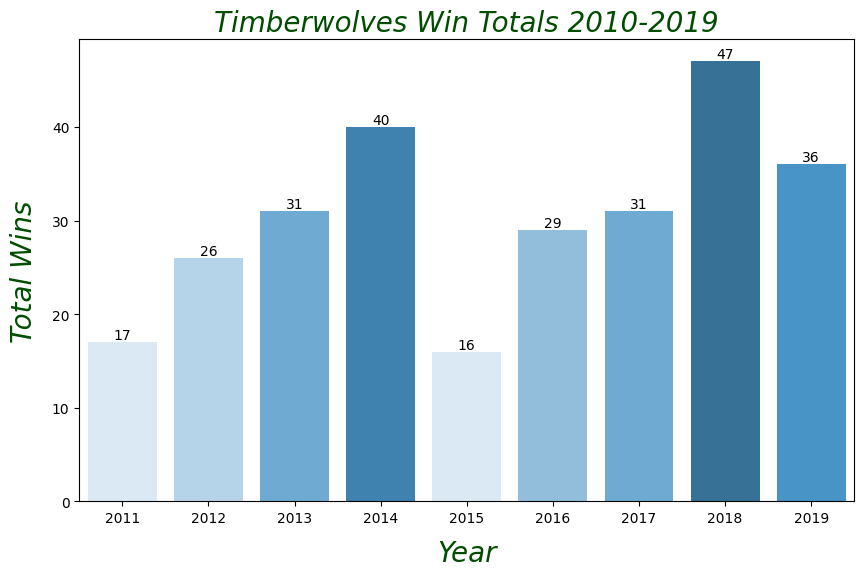

In [26]:
plt.figure(figsize = (10,6))

#for plotting need the y axis to be numeric, so converting strings to numerics
twolves_standings['Wins'] = pd.to_numeric(twolves_standings['Wins'])

#colors
colors = ['#D6EAF8', '#AED6F1', '#5DADE2', '#2E86C1', '#D6EAF8', '#85C1E9', '#5DADE2', '#2874A6', '#3498DB'  ]

barplt = sns.barplot(x=twolves_standings['Year'], y=twolves_standings['Wins'], palette = colors)
plt.title("Timberwolves Win Totals 2010-2019", fontsize = 20, color = '#004d00', fontstyle = 'oblique')
plt.xlabel("Year", fontsize = 20, labelpad = 10, color = '#004d00', fontstyle = 'oblique')
plt.ylabel("Total Wins", fontsize = 20, labelpad = 10, color = '#004d00', fontstyle = 'oblique' )


for p in barplt.patches:
    barplt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

# **JAZZ VISUALIZATION**

In [27]:
#Get only data for the Utah Jazz
jazz_df = nba_records_vs_crime[nba_records_vs_crime['Team'] == "Utah Jazz"]
jazz_df

,Team,Rk,Overall,Home,Road,Year,State,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
19,Utah Jazz,18,39-43,21-20,18-23,2011,Utah,"2,814,347","84,084","13,170","64,727","6,187","5,547","3,517",50,901,"1,079"
42,Utah Jazz,15,36-30,25-8,11-22,2012,Utah,"2,855,287","85,424","12,943","66,482","5,999","5,876","3,783",50,943,"1,100"
67,Utah Jazz,15,43-39,30-11,13-28,2013,Utah,"2,900,872","85,586","13,333","64,788","7,465","6,498","3,784",49,"1,422","1,243"
100,Utah Jazz,27,25-57,16-25,9-32,2014,Utah,"2,942,902","84,711","11,518","65,895","7,298","6,346","3,513",67,"1,454","1,312"
123,Utah Jazz,20,38-44,21-20,17-24,2015,Utah,"2,995,919","89,278","12,468","68,103","8,707","7,071","4,046",54,"1,645","1,326"
150,Utah Jazz,19,40-42,24-17,16-25,2016,Utah,"3,051,217","90,058","12,836","67,834","9,388","7,407","4,274",72,"1,520","1,541"
168,Utah Jazz,8,51-31,29-12,22-19,2017,Utah,"3,101,833","86,238","11,817","64,892","9,529","7,410","4,172",73,"1,697","1,468"
201,Utah Jazz,11,48-34,28-13,20-21,2018,Utah,"3,161,105","75,156","9,968","57,460","7,728","7,368","4,319",60,"1,753","1,236"
226,Utah Jazz,8,50-32,29-12,21-20,2019,Utah,"3,205,958","69,546","8,871","53,937","6,738","7,553","4,534",72,"1,822","1,125"


In [28]:
jazz_df = jazz_df[['Team', 'Rk', 'Overall','Year']]
jazz_df

,Team,Rk,Overall,Year
19,Utah Jazz,18,39-43,2011
42,Utah Jazz,15,36-30,2012
67,Utah Jazz,15,43-39,2013
100,Utah Jazz,27,25-57,2014
123,Utah Jazz,20,38-44,2015
150,Utah Jazz,19,40-42,2016
168,Utah Jazz,8,51-31,2017
201,Utah Jazz,11,48-34,2018
226,Utah Jazz,8,50-32,2019


In [29]:
wins = []
losses=[]
for record in jazz_df['Overall']:
  wins.append(record[:2])
  losses.append(record[3:5])
print(wins)
print(losses)

['39', '36', '43', '25', '38', '40', '51', '48', '50']
['43', '30', '39', '57', '44', '42', '31', '34', '32']


In [30]:
jazz_df['Wins'] = wins
jazz_df['Losses'] = losses
jazz_df

<ipython-input-30-1355bf12c889>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jazz_df['Wins'] = wins
<ipython-input-30-1355bf12c889>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jazz_df['Losses'] = losses


,Team,Rk,Overall,Year,Wins,Losses
19,Utah Jazz,18,39-43,2011,39,43
42,Utah Jazz,15,36-30,2012,36,30
67,Utah Jazz,15,43-39,2013,43,39
100,Utah Jazz,27,25-57,2014,25,57
123,Utah Jazz,20,38-44,2015,38,44
150,Utah Jazz,19,40-42,2016,40,42
168,Utah Jazz,8,51-31,2017,51,31
201,Utah Jazz,11,48-34,2018,48,34
226,Utah Jazz,8,50-32,2019,50,32


<ipython-input-31-0f78ba72d77b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jazz_df['Wins'] = pd.to_numeric(jazz_df['Wins'])


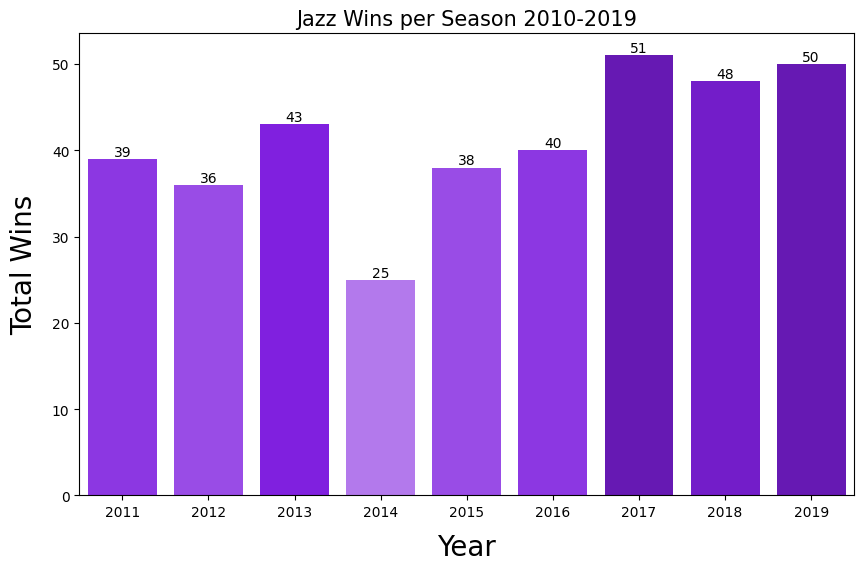

In [31]:
plt.figure(figsize = (10,6))

#for plotting need the y axis to be numeric, so converting strings to numerics
jazz_df['Wins'] = pd.to_numeric(jazz_df['Wins'])

#colors
colors = ['#8c1aff', '#9933ff', '#8000ff', '#b366ff', '#9933ff', '#8c1aff', '#6600cc', '#7300e6', '#6600cc'  ]

barplt = sns.barplot(x=jazz_df['Year'], y=jazz_df['Wins'], palette = colors)
plt.title("Jazz Wins per Season 2010-2019", fontsize = 15)
plt.xlabel("Year", fontsize = 20, labelpad = 10)
plt.ylabel("Total Wins", fontsize = 20, labelpad = 10 )

for p in barplt.patches:
    barplt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

#CONNECT

In [32]:
"""
Data is going to be in a SQL relational database
Using AWS

Creating three tables for relational database
1. nba_standings table
2. property_crimes table
3. violent_crimes table

CODE WILL DROP RDB TABLES BEFORE CREATING THEM

In this load step I will be creating the primary and foreign key.
The Primary key for each table is 'id'.
The foreign key that connects each table is 'state_id'

conn.close() AT END!
"""

# AWS - Connecting to my database
#import PostgreSQL
import psycopg2
def get_conn_cur():
 # UPDATE WITH DATABASE INFO!

#connect and store as conn
 conn = psycopg2.connect(
    host="ista322finalproject.ccbfbxwein0q.us-east-1.rds.amazonaws.com",
    database="rl_ista322final",
    user="rl_ista322final",
    password="rleviton",
    port='5432'
    )

 cur = conn.cursor()
 return(conn, cur)

In [33]:
# create databse connection and cursor
conn, cur = get_conn_cur()

In [34]:
# show that it is a connection object with my credentials
conn

<connection object at 0x7e42a8285440; dsn: 'user=rl_ista322final password=xxx dbname=rl_ista322final host=ista322finalproject.ccbfbxwein0q.us-east-1.rds.amazonaws.com port=5432', closed: 0>

In [35]:
# functions in case we want to check our data

# run_query function
def run_query(query_string):

 conn, cur = get_conn_cur() # get connection and cursor

 cur.execute(query_string) # executing string as before

 my_data = cur.fetchall() # fetch query data as before

 # here we're extracting the 0th element for each item in cur.description
 colnames = [desc[0] for desc in cur.description]

 cur.close() # close
 conn.close() # close

 return(colnames, my_data) # return column names AND data

# Column name function for checking out what's in a table
def get_column_names(table_name): # arguement of table_name
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 column_name_query = """SELECT column_name FROM information_schema.columns
    WHERE table_name = '%s' """ %table_name

 cur.execute(column_name_query) # exectue
 my_data = cur.fetchall() # store

 cur.close() # close
 conn.close() # close

 return(my_data) # return

# Check table_names
def get_table_names():
  conn, cur = get_conn_cur() # get connection and cursor

  # query to get table names
  table_name_query = """SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public' """

  cur.execute(table_name_query) # execute
  my_data = cur.fetchall() # fetch results

  cur.close() #close cursor
  conn.close() # close connection

  return(my_data) # return your fetched results

# make sql_head function
def sql_head(table_name):
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 head_query = """SELECT * FROM %s LIMIT 5; """ %table_name

 cur.execute(head_query) # exectue
 colnames = [desc[0] for desc in cur.description] # get column names
 my_data = cur.fetchall() # store first five rows

 cur.close() # close
 conn.close() # close

 df = pd.DataFrame(data = my_data, columns = colnames) # make into df

 return(df) # return

# drop a table from your rdb (if you try to create a table that already exists, it'll throw an error)
def my_drop_table(table_name):
  conn, cur = get_conn_cur()
  tq = """DROP TABLE IF EXISTS %s CASCADE;""" %table_name
  cur.execute(tq)
  conn.commit()

In [36]:
# I want to create and push tables to AWS.. So I am going to split up the merged df, nba_records_vs_crimed, into three smaller tables
# first lets inspect the full df
nba_records_vs_crime

,Team,Rk,Overall,Home,Road,Year,State,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
0,Chicago Bulls,1,62-20,36-5,26-15,2011,Illinois,"12,859,752","344,468","77,719","237,362","29,387","54,523","30,495",781,"3,030","20,217"
1,San Antonio Spurs,2,61-21,36-5,25-16,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
2,Dallas Mavericks,4,57-25,29-12,28-13,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
3,Houston Rockets,14,43-39,25-16,18-23,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
4,Miami Heat,3,58-24,30-11,28-13,2011,Florida,"19,082,262","671,200","170,171","461,408","39,621","98,198","66,319",984,"5,273","25,622"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,New Orleans Pelicans,24,33-49,19-22,14-27,2019,Louisiana,"4,648,794","146,993","26,918","109,359","10,716","25,537","18,695",544,"2,273","4,025"
239,Atlanta Hawks,26,29-53,17-24,12-29,2019,Georgia,"10,617,423","252,249","39,506","188,967","23,776","36,170","24,633",654,"2,922","7,961"
240,Chicago Bulls,27,22-60,9-32,13-28,2019,Illinois,"12,671,821","233,984","34,433","180,776","18,775","51,561","32,187",832,"6,078","12,464"
241,Cleveland Cavaliers,28,19-63,13-28,6-35,2019,Ohio,"11,689,100","240,291","43,894","177,725","18,672","34,269","19,154",538,"5,731","8,846"


In [37]:
# each table must have a primary key so I will create primary key called id that starts at 1
nba_records_vs_crime.insert(0, 'id', range(1, len(nba_records_vs_crime) + 1))
nba_records_vs_crime

,id,Team,Rk,Overall,Home,Road,Year,State,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
0,1,Chicago Bulls,1,62-20,36-5,26-15,2011,Illinois,"12,859,752","344,468","77,719","237,362","29,387","54,523","30,495",781,"3,030","20,217"
1,2,San Antonio Spurs,2,61-21,36-5,25-16,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
2,3,Dallas Mavericks,4,57-25,29-12,28-13,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
3,4,Houston Rockets,14,43-39,25-16,18-23,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
4,5,Miami Heat,3,58-24,30-11,28-13,2011,Florida,"19,082,262","671,200","170,171","461,408","39,621","98,198","66,319",984,"5,273","25,622"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,New Orleans Pelicans,24,33-49,19-22,14-27,2019,Louisiana,"4,648,794","146,993","26,918","109,359","10,716","25,537","18,695",544,"2,273","4,025"
239,240,Atlanta Hawks,26,29-53,17-24,12-29,2019,Georgia,"10,617,423","252,249","39,506","188,967","23,776","36,170","24,633",654,"2,922","7,961"
240,241,Chicago Bulls,27,22-60,9-32,13-28,2019,Illinois,"12,671,821","233,984","34,433","180,776","18,775","51,561","32,187",832,"6,078","12,464"
241,242,Cleveland Cavaliers,28,19-63,13-28,6-35,2019,Ohio,"11,689,100","240,291","43,894","177,725","18,672","34,269","19,154",538,"5,731","8,846"


#LOAD - TABLE 1: nba_standings

In [38]:
'''
I have everything needed in the merged df, so now it is time to start spliting the df up.
first I will create the nba_standings table, so I need to create a new df to model this table after. so I will select necessary columns to make nba_standings_df
'''
nba_standings_df = nba_records_vs_crime[['id','State', 'Team', 'Rk', 'Overall', 'Home', 'Road', 'Year']]

In [39]:
print(nba_standings_df.head())

   id     State               Team  Rk Overall   Home   Road  Year
0   1  Illinois      Chicago Bulls   1   62-20   36-5  26-15  2011
1   2     Texas  San Antonio Spurs   2   61-21   36-5  25-16  2011
2   3     Texas   Dallas Mavericks   4   57-25  29-12  28-13  2011
3   4     Texas    Houston Rockets  14   43-39  25-16  18-23  2011
4   5   Florida         Miami Heat   3   58-24  30-11  28-13  2011


In [91]:
# if the table is already created, lets call our drop function
my_drop_table(table_name = 'nba_standings')

In [97]:

get_table_names()

[]

In [98]:
#now I will create the nba_standings table
conn, curr = get_conn_cur()
cur = conn.cursor()

q = """ CREATE TABLE nba_standings (
    id SERIAL PRIMARY KEY,
    State VARCHAR(20) NOT NULL,
    Team VARCHAR(40) NOT NULL,
    Rk INT NOT NUll,
    Overall VARCHAR(8) NOT NULL,
    Home VARCHAR(8) NOT NULL,
    Road VARCHAR(8) NOT NULL,
    Year INT NOT NULL) """

cur.execute(q)
conn.commit()

In [99]:
#We should now have one table created called nba_standings
get_table_names()

[('nba_standings',)]

In [100]:
#we can also the columns we just created
get_column_names(table_name = 'nba_standings')

[('id',),
 ('state',),
 ('team',),
 ('rk',),
 ('overall',),
 ('home',),
 ('road',),
 ('year',)]

In [102]:
#convery df into numpy array in order to insert values into table
data_tups = [tuple(x) for x in nba_standings_df.to_numpy()]

In [103]:
#insert into table query
iq =    '''
        INSERT INTO nba_standings(id, state, team, rk, overall, home, road, year) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)

        '''

In [104]:
'''
lets push this table with all the standings to our relational database. an analysist could use this data to find teams that have drastically gotten better or worse in this time span.
'''

#execute and commit query
cur.executemany(iq, data_tups)
conn.commit()

In [105]:
sql_head(table_name = 'nba_standings')

,id,state,team,rk,overall,home,road,year
0,1,Illinois,Chicago Bulls,1,62-20,36-5,26-15,2011
1,2,Texas,San Antonio Spurs,2,61-21,36-5,25-16,2011
2,3,Texas,Dallas Mavericks,4,57-25,29-12,28-13,2011
3,4,Texas,Houston Rockets,14,43-39,25-16,18-23,2011
4,5,Florida,Miami Heat,3,58-24,30-11,28-13,2011


In [49]:
#simple query to extract the data about the Chicago Bulls records

q = '''
    SELECT year, team, overall
    FROM nba_standings
    WHERE team = 'Chicago Bulls'
    '''

run_query(q)

(['year', 'team', 'overall'],
 [(2011, 'Chicago Bulls', '62-20'),
  (2012, 'Chicago Bulls', '50-16'),
  (2013, 'Chicago Bulls', '45-37'),
  (2014, 'Chicago Bulls', '48-34'),
  (2015, 'Chicago Bulls', '50-32'),
  (2016, 'Chicago Bulls', '42-40'),
  (2017, 'Chicago Bulls', '41-41'),
  (2018, 'Chicago Bulls', '27-55'),
  (2019, 'Chicago Bulls', '22-60')])

#LOAD - TABLE 2: property_crimes

In [50]:
'''
now lets create the PROPERTY crimes table
'''

#take a look at the merged df to see which columns we want for our property crimes table
nba_records_vs_crime

,id,Team,Rk,Overall,Home,Road,Year,State,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
0,1,Chicago Bulls,1,62-20,36-5,26-15,2011,Illinois,"12,859,752","344,468","77,719","237,362","29,387","54,523","30,495",781,"3,030","20,217"
1,2,San Antonio Spurs,2,61-21,36-5,25-16,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
2,3,Dallas Mavericks,4,57-25,29-12,28-13,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
3,4,Houston Rockets,14,43-39,25-16,18-23,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
4,5,Miami Heat,3,58-24,30-11,28-13,2011,Florida,"19,082,262","671,200","170,171","461,408","39,621","98,198","66,319",984,"5,273","25,622"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,New Orleans Pelicans,24,33-49,19-22,14-27,2019,Louisiana,"4,648,794","146,993","26,918","109,359","10,716","25,537","18,695",544,"2,273","4,025"
239,240,Atlanta Hawks,26,29-53,17-24,12-29,2019,Georgia,"10,617,423","252,249","39,506","188,967","23,776","36,170","24,633",654,"2,922","7,961"
240,241,Chicago Bulls,27,22-60,9-32,13-28,2019,Illinois,"12,671,821","233,984","34,433","180,776","18,775","51,561","32,187",832,"6,078","12,464"
241,242,Cleveland Cavaliers,28,19-63,13-28,6-35,2019,Ohio,"11,689,100","240,291","43,894","177,725","18,672","34,269","19,154",538,"5,731","8,846"


In [51]:
# selecting columns I want for the property crimes table, so selecting all property related columns
prop_crime_df = nba_records_vs_crime[['id', 'Year', 'State', 'Population', 'Total_Property_Crimes', 'Property_Burglary', 'Propert_Larceny', 'Property_Motor']]
prop_crime_df

,id,Year,State,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor
0,1,2011,Illinois,"12,859,752","344,468","77,719","237,362","29,387"
1,2,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924"
2,3,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924"
3,4,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924"
4,5,2011,Florida,"19,082,262","671,200","170,171","461,408","39,621"
...,...,...,...,...,...,...,...,...
238,239,2019,Louisiana,"4,648,794","146,993","26,918","109,359","10,716"
239,240,2019,Georgia,"10,617,423","252,249","39,506","188,967","23,776"
240,241,2019,Illinois,"12,671,821","233,984","34,433","180,776","18,775"
241,242,2019,Ohio,"11,689,100","240,291","43,894","177,725","18,672"


In [52]:
# we can see that we have duplicated states for each year, but they all display the same information, so lets get rid of the state duplicates for each year
prop_crime_df = prop_crime_df.drop_duplicates(subset=['Year', 'State'])
prop_crime_df

,id,Year,State,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor
0,1,2011,Illinois,"12,859,752","344,468","77,719","237,362","29,387"
1,2,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924"
4,5,2011,Florida,"19,082,262","671,200","170,171","461,408","39,621"
6,7,2011,California,"37,683,933","973,822","230,075","596,905","146,842"
10,11,2011,Massachusetts,"6,607,003","148,829","36,403","101,644","10,782"
...,...,...,...,...,...,...,...,...
238,239,2019,Louisiana,"4,648,794","146,993","26,918","109,359","10,716"
239,240,2019,Georgia,"10,617,423","252,249","39,506","188,967","23,776"
240,241,2019,Illinois,"12,671,821","233,984","34,433","180,776","18,775"
241,242,2019,Ohio,"11,689,100","240,291","43,894","177,725","18,672"


In [96]:
my_drop_table(table_name = 'property_crimes')

In [106]:
q = """ CREATE TABLE property_crimes (
    id SERIAL PRIMARY KEY,
    Year INT NOT NULL,
    State VARCHAR(20) NOT NULL,
    Population VARCHAR(20) NOT NULL,
    Total_Property_Crimes VARCHAR(20) NOT NULL,
    Property_Burglary VARCHAR(20) NOT NULL,
    Property_Larceny VARCHAR(20) NOT NULL,
    Property_Motor VARCHAR(20) NOT NULL
    ) """

cur.execute(q)
conn.commit()

In [107]:
#check to see if the new crimes table added
get_table_names()

[('nba_standings',), ('property_crimes',)]

In [108]:
get_column_names(table_name = 'property_crimes')

[('id',),
 ('year',),
 ('state',),
 ('population',),
 ('total_property_crimes',),
 ('property_burglary',),
 ('property_larceny',),
 ('property_motor',)]

In [109]:
data_tups = [tuple(x) for x in prop_crime_df.to_numpy()]

In [110]:
iq = """INSERT INTO property_crimes(id, year, state, population, total_property_crimes, property_burglary, property_larceny, property_motor)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"""

In [111]:
cur.executemany(iq, data_tups)
conn.commit()

In [112]:
sql_head(table_name = 'property_crimes')

,id,year,state,population,total_property_crimes,property_burglary,property_larceny,property_motor
0,1,2011,Illinois,"12,859,752","344,468","77,719","237,362","29,387"
1,2,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924"
2,5,2011,Florida,"19,082,262","671,200","170,171","461,408","39,621"
3,7,2011,California,"37,683,933","973,822","230,075","596,905","146,842"
4,11,2011,Massachusetts,"6,607,003","148,829","36,403","101,644","10,782"


In [61]:
# simple test query to see the years where minnesota's property crimes were the highest

q = """ SELECT year, population, total_property_crimes
        FROM property_crimes
        WHERE state = 'Minnesota'
        ORDER BY total_property_crimes DESC
        LIMIT 3
    """

run_query(q)

(['year', 'population', 'total_property_crimes'],
 [(2012, '5,379,139', '138,152'),
  (2011, '5,347,299', '136,183'),
  (2013, '5,420,380', '131,195')])

#LOAD - TABLE 3: violent_crimes

In [62]:
# now creating violent_crimes table - lets see which columns we want to grab
nba_records_vs_crime.head()

,id,Team,Rk,Overall,Home,Road,Year,State,Population,Total_Property_Crimes,Property_Burglary,Propert_Larceny,Property_Motor,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
0,1,Chicago Bulls,1,62-20,36-5,26-15,2011,Illinois,"12,859,752","344,468","77,719","237,362","29,387","54,523","30,495",781,"3,030","20,217"
1,2,San Antonio Spurs,2,61-21,36-5,25-16,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
2,3,Dallas Mavericks,4,57-25,29-12,28-13,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
3,4,Houston Rockets,14,43-39,25-16,18-23,2011,Texas,"25,631,778","892,810","215,755","613,131","63,924","104,734","67,498","1,130","7,486","28,620"
4,5,Miami Heat,3,58-24,30-11,28-13,2011,Florida,"19,082,262","671,200","170,171","461,408","39,621","98,198","66,319",984,"5,273","25,622"


In [63]:
# creating violent crimes df to model SQL table after
violent_crimes_df = nba_records_vs_crime[['id', 'Year', 'State', 'Population', 'Total_Violent_Crimes', 'Violent_Assault',	'Violent_Murder',	'Violent_Rape',	'Violent_Robbery']]
violent_crimes_df

,id,Year,State,Population,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
0,1,2011,Illinois,"12,859,752","54,523","30,495",781,"3,030","20,217"
1,2,2011,Texas,"25,631,778","104,734","67,498","1,130","7,486","28,620"
2,3,2011,Texas,"25,631,778","104,734","67,498","1,130","7,486","28,620"
3,4,2011,Texas,"25,631,778","104,734","67,498","1,130","7,486","28,620"
4,5,2011,Florida,"19,082,262","98,198","66,319",984,"5,273","25,622"
...,...,...,...,...,...,...,...,...,...
238,239,2019,Louisiana,"4,648,794","25,537","18,695",544,"2,273","4,025"
239,240,2019,Georgia,"10,617,423","36,170","24,633",654,"2,922","7,961"
240,241,2019,Illinois,"12,671,821","51,561","32,187",832,"6,078","12,464"
241,242,2019,Ohio,"11,689,100","34,269","19,154",538,"5,731","8,846"


In [64]:
# we can see that we have texas three times once again in 2011, so need to drop these duplicate values again like we did in property_crimes because it is repeated data.
violent_crimes_df = violent_crimes_df.drop_duplicates(subset=['Year', 'State'])
violent_crimes_df

,id,Year,State,Population,Total_Violent_Crimes,Violent_Assault,Violent_Murder,Violent_Rape,Violent_Robbery
0,1,2011,Illinois,"12,859,752","54,523","30,495",781,"3,030","20,217"
1,2,2011,Texas,"25,631,778","104,734","67,498","1,130","7,486","28,620"
4,5,2011,Florida,"19,082,262","98,198","66,319",984,"5,273","25,622"
6,7,2011,California,"37,683,933","154,943","91,195","1,792","7,665","54,291"
10,11,2011,Massachusetts,"6,607,003","28,232","19,626",184,"1,654","6,768"
...,...,...,...,...,...,...,...,...,...
238,239,2019,Louisiana,"4,648,794","25,537","18,695",544,"2,273","4,025"
239,240,2019,Georgia,"10,617,423","36,170","24,633",654,"2,922","7,961"
240,241,2019,Illinois,"12,671,821","51,561","32,187",832,"6,078","12,464"
241,242,2019,Ohio,"11,689,100","34,269","19,154",538,"5,731","8,846"


In [113]:
# drop table if it already exists
my_drop_table(table_name='violent_crimes')

In [114]:
# check to ensure table has not been created yet, but the other two have
get_table_names()

[('nba_standings',), ('property_crimes',)]

In [115]:
# create violent crimes tale
q = """ CREATE TABLE violent_crimes (
    id SERIAL PRIMARY KEY,
    Year INT NOT NULL,
    State VARCHAR(20) NOT NULL,
    Population VARCHAR(20) NOT NULL,
    Total_Violent_Crimes VARCHAR(20) NOT NULL,
    Violent_Assault VARCHAR(20) NOT NULL,
    Violent_Murder VARCHAR(20) NOT NULL,
    Violent_Rape VARCHAR(20) NOT NULL,
    Violent_Robbery VARCHAR(20) NOT NULL
    ) """

cur.execute(q)
conn.commit()

In [116]:
get_column_names(table_name = 'violent_crimes')

[('id',),
 ('year',),
 ('state',),
 ('population',),
 ('total_violent_crimes',),
 ('violent_assault',),
 ('violent_murder',),
 ('violent_rape',),
 ('violent_robbery',)]

In [117]:
# create tuples of data
data_tups = [tuple(x) for x in violent_crimes_df.to_numpy()]

In [118]:
# insert data into violent crimes table
iq = """INSERT INTO violent_crimes(id, year, state, population, total_violent_crimes, violent_assault, violent_murder, violent_rape, violent_robbery)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"""

In [119]:
# takes (query, tuples) - makes an insert string for every tuple and therefore inserts each row
cur.executemany(iq, data_tups)
conn.commit()

In [120]:
sql_head(table_name = 'violent_crimes')

,id,year,state,population,total_violent_crimes,violent_assault,violent_murder,violent_rape,violent_robbery
0,1,2011,Illinois,"12,859,752","54,523","30,495",781,"3,030","20,217"
1,2,2011,Texas,"25,631,778","104,734","67,498","1,130","7,486","28,620"
2,5,2011,Florida,"19,082,262","98,198","66,319",984,"5,273","25,622"
3,7,2011,California,"37,683,933","154,943","91,195","1,792","7,665","54,291"
4,11,2011,Massachusetts,"6,607,003","28,232","19,626",184,"1,654","6,768"


In [121]:
conn.close()

#QUERIES

In [81]:
'''
Selecting Total Property Crimes and Total Violent Crimes by State for each Year:
'''


q = """ SELECT pc.year, pc.state, pc.population, pc.total_property_crimes, vc.total_violent_crimes
        FROM property_crimes AS pc
        JOIN violent_crimes AS vc ON pc.Year = vc.Year AND pc.State = vc.State;
    """


run_query(q)

(['year',
  'state',
  'population',
  'total_property_crimes',
  'total_violent_crimes'],
 [(2011, 'Illinois', '12,859,752', '344,468', '54,523'),
  (2011, 'Texas', '25,631,778', '892,810', '104,734'),
  (2011, 'Florida', '19,082,262', '671,200', '98,198'),
  (2011, 'California', '37,683,933', '973,822', '154,943'),
  (2011, 'Massachusetts', '6,607,003', '148,829', '28,232'),
  (2011, 'Oklahoma', '3,784,163', '127,618', '17,311'),
  (2011, 'Colorado', '5,116,302', '132,781', '16,085'),
  (2011, 'Oregon', '3,868,229', '121,869', '9,643'),
  (2011, 'Tennessee', '6,399,787', '230,900', '38,895'),
  (2011, 'Georgia', '9,812,460', '357,235', '36,762'),
  (2011, 'New York', '19,501,616', '371,837', '77,463'),
  (2011, 'Pennsylvania', '12,743,948', '283,442', '46,189'),
  (2011, 'Arizona', '6,467,315', '229,896', '26,789'),
  (2011, 'Utah', '2,814,347', '84,084', '5,547'),
  (2011, 'Indiana', '6,516,353', '206,016', '21,619'),
  (2011, 'Wisconsin', '5,709,843', '139,912', '14,268'),
  (2011,

In [87]:
#nba standings with property crimes by year and state

q = """ SELECT ns.State, ns.Team, ns.Overall, ns.Home, ns.Year, pc.Total_Property_Crimes
        FROM nba_standings AS ns
        JOIN property_crimes AS pc ON ns.Year = pc.Year AND ns.State = pc.State;"""

run_query(q)

(['state', 'team', 'overall', 'home', 'year', 'total_property_crimes'],
 [('Illinois', 'Chicago Bulls', '62-20', '36-5', 2011, '344,468'),
  ('Texas', 'San Antonio Spurs', '61-21', '36-5', 2011, '892,810'),
  ('Texas', 'Dallas Mavericks', '57-25', '29-12', 2011, '892,810'),
  ('Texas', 'Houston Rockets', '43-39', '25-16', 2011, '892,810'),
  ('Florida', 'Miami Heat', '58-24', '30-11', 2011, '671,200'),
  ('Florida', 'Orlando Magic', '52-30', '29-12', 2011, '671,200'),
  ('California', 'Los Angeles Lakers', '57-25', '30-11', 2011, '973,822'),
  ('California', 'Golden State Warriors', '36-46', '26-15', 2011, '973,822'),
  ('California', 'Los Angeles Clippers', '32-50', '23-18', 2011, '973,822'),
  ('California', 'Sacramento Kings', '24-58', '11-30', 2011, '973,822'),
  ('Massachusetts', 'Boston Celtics', '56-26', '33-8', 2011, '148,829'),
  ('Oklahoma', 'Oklahoma City Thunder', '55-27', '30-11', 2011, '127,618'),
  ('Colorado', 'Denver Nuggets', '50-32', '33-8', 2011, '132,781'),
  ('Ore

In [89]:
# nba standings with violent crimes by year and state
q = '''SELECT ns.State, ns.Team, ns.Overall, ns.Home, ns.Year, vc.Total_Violent_crimes
        FROM nba_standings AS ns
        JOIN violent_crimes AS vc ON ns.Year = vc.Year AND ns.State = vc.State;'''

run_query(q)

(['state', 'team', 'overall', 'home', 'year', 'total_violent_crimes'],
 [('Illinois', 'Chicago Bulls', '62-20', '36-5', 2011, '54,523'),
  ('Texas', 'San Antonio Spurs', '61-21', '36-5', 2011, '104,734'),
  ('Texas', 'Dallas Mavericks', '57-25', '29-12', 2011, '104,734'),
  ('Texas', 'Houston Rockets', '43-39', '25-16', 2011, '104,734'),
  ('Florida', 'Miami Heat', '58-24', '30-11', 2011, '98,198'),
  ('Florida', 'Orlando Magic', '52-30', '29-12', 2011, '98,198'),
  ('California', 'Los Angeles Lakers', '57-25', '30-11', 2011, '154,943'),
  ('California', 'Golden State Warriors', '36-46', '26-15', 2011, '154,943'),
  ('California', 'Los Angeles Clippers', '32-50', '23-18', 2011, '154,943'),
  ('California', 'Sacramento Kings', '24-58', '11-30', 2011, '154,943'),
  ('Massachusetts', 'Boston Celtics', '56-26', '33-8', 2011, '28,232'),
  ('Oklahoma', 'Oklahoma City Thunder', '55-27', '30-11', 2011, '17,311'),
  ('Colorado', 'Denver Nuggets', '50-32', '33-8', 2011, '16,085'),
  ('Oregon', '

In [ ]:
#future ideas...
# correlation between poor performaing teams and higher crime rates - identify 5 worst teams and then identify the states with the highest crime rates
# if a state has more than one nba team is more likely to have more crimes - we see that CA and TX are the highest
# compare teams with records lower than 500% and higher
# which more prevelant property or violent crimes